In [1]:
import fasttext
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import random
import matplotlib.pylab as plt

In [2]:
ft = fasttext.load_model('../../../data/MX.bin')

In [3]:
len(ft.get_words())

571689

In [4]:
type(ft.get_words())

list

In [5]:
words = ft.get_words() 
# words = random.sample(ft.get_words(), 1500)

In [6]:
# ft.get_word_vector() Returns the vector representation of provided words (unsupervised training) or provided labels (supervised training).
# get_word_vector         # Get the vector representation of word.


%time x = [ft.get_word_vector(w) for w in words]
# normalize y antes del k-means
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

CPU times: user 7.61 s, sys: 314 ms, total: 7.92 s
Wall time: 8.31 s


In [ ]:
%time df = pd.DataFrame(x)

In [ ]:
df.head(10)

In [ ]:
%time df.describe()

In [20]:
kmeans = KMeans(n_clusters = 100, init = 'k-means++', random_state = 42,  max_iter=100)
%time kmeans.fit(x)

ValueError: n_samples=15 should be >= n_clusters=100.

In [17]:
#fet.get_words
#ft.get_sentence_vector

# sacar los vectores del get_words
# 
#X = random.sample(X, 150000)
#len(X)

In [6]:
# X = pd.DataFrame(ft.get_words())

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
# x csr_matrix - sparse matrix (or dense matrix) matriz de dispersión

In [8]:
X

<150000x146688 sparse matrix of type '<class 'numpy.float64'>'
	with 147908 stored elements in Compressed Sparse Row format>

In [9]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42,  max_iter=100)
%time kmeans.fit(X)

Wall time: 19.9 s


KMeans(max_iter=100, n_clusters=10, random_state=42)

In [8]:
kmeans = KMeans(n_clusters = 600, init = 'k-means++', random_state = 42,  max_iter=100)
# kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

In [9]:
%time kmeans.fit(y)

Wall time: 15.2 s


KMeans(max_iter=100, n_clusters=600, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters = 4000, init = 'k-means++', random_state = 42,  max_iter=100)
%time kmeans.fit(X)

In [ ]:
centroids = kmeans.cluster_centers_

In [13]:
#plt.spy(X, markersize=0.3)
#plt.spy(centroids, precision=0.1, markersize=5)

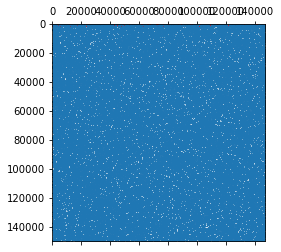

In [17]:
fig, ax = plt.subplots()
p2 = ax.spy(centroids, marker='o', markersize=1.7, c='red')
p1 = ax.spy(X, markersize=0.3)
plt.show()

In [25]:
Y = vectorizer.transform(["chrome browser to open."])
prediction = kmeans.predict(Y)
print(prediction)

[2]


In [23]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 compele
 eith
 ejecucion
 eject
 ejecentral
 ejecayan
 ejec
 ejdeque
 ejar
 ejalee
Cluster 1:
 ontologica
 eizamusica
 ejec
 ejdeque
 ejar
 ejalee
 ejale
 eizita
 eiya
 ejecentral
Cluster 2:
 _usr
 __
 _url
 no
 el
 que
 me
 yo
 hoy
 _numam
Cluster 3:
 preparacion
 힐링타임
 eisten
 ejecayan
 ejec
 ejdeque
 ejar
 ejalee
 ejale
 eizita
